In [1]:
#convertir les equations sous forme matricielle 
#contenue de la matrice et theta
import numpy as np;
from sklearn.datasets import make_regression
#pour visualiser les données 
import matplotlib.pyplot as plt 

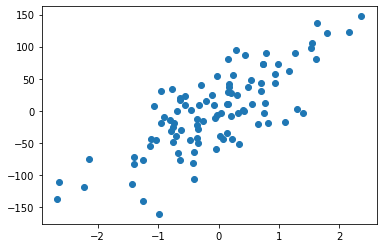

In [2]:
# un modèle polynomiale
x, y = make_regression(n_samples = 100 , n_features = 2, noise = 10)

plt.scatter(x[:,0], y)#affiche que la première variable

In [3]:
print(x.shape)
#make_regression , les dimentions des y sont incompletes -- donc [reshape] pour redimentionner
y = y.reshape(y.shape[0],1) #on prend le nombre de lignes dans y appelé shape[0]
print(y.shape)

(100, 2)
(100, 1)


In [4]:
#créer matrice X 
#hstake coller deux vecteurs numpy ensemble
#on veut qu'une collonne
X = np.hstack((x, np.ones((x.shape[0],1))))
print (X.shape)
print (X[:10])#print juste les 10 première lignes 

(100, 3)
[[-1.11386135  0.2870892   1.        ]
 [ 1.52968127  0.34664013  1.        ]
 [ 0.23472026  1.16246292  1.        ]
 [ 0.76792671 -0.98742272  1.        ]
 [ 0.98438538  0.47365234  1.        ]
 [-0.77406375  1.4794784   1.        ]
 [ 1.2628565   1.3825045   1.        ]
 [ 0.40389668 -0.77153706  1.        ]
 [ 1.80304977  0.25105755  1.        ]
 [-2.64704306  0.71537866  1.        ]]


In [5]:
theta = np.random.randn(3,1)
theta

array([[ 0.45355265],
       [-0.91935587],
       [ 1.32718586]])

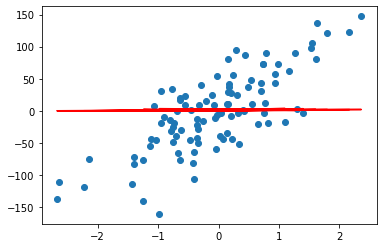

In [6]:
#Modèle linéraire 

def model (X,theta):
    #profuit matriciel
    return X.dot(theta)

plt.scatter(x[:,0],y)
plt.plot(x[:,0],model(X,theta),c ='r')

In [7]:
#fonction côut
def cost_fonction(x,y,theta):
    m = len(y)
    return 1/(2*m)* np.sum((model(X,theta)-y)**2)

In [8]:
cost_fonction (X,y,theta) #on veut que ce soit proche du 0

1927.5403892113939

In [9]:
#gradients et descente de gradients 
def grad(X,y,theta):
    m = len(y)
    return 1/m* X.T.dot(model(X,theta)-y)

In [10]:
# descente de gradients 

def gradient_descent(X,y,theta,learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_fonction(X,y,theta)
    return theta, cost_history

In [11]:
learning_rate = 0.01
n_iterations = 1000

theta_final, cost_history = gradient_descent(X,y,theta,learning_rate, n_iterations)#soit, entriaine plus, soit augmente alpha = learning_rate
# ok j'ai changer le learning rate de 0.001 à 0.01  bcp mieux 

In [12]:
theta_final

array([[51.74895515],
       [40.25616859],
       [-1.48295087]])

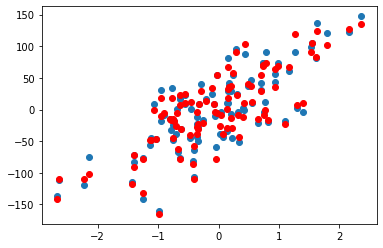

In [13]:
#créer un vecteur de prédiction 
predictions = model(X,theta_final)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predictions,c='r')

<IPython.core.display.Javascript object>


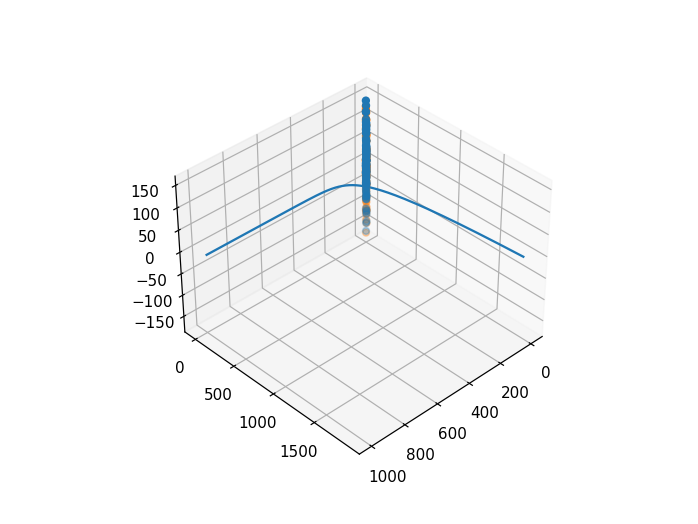

In [14]:
#visualiser en 3D
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(x[:,0],x[:,1],y)
ax.scatter(x[:,0],x[:,1],predictions)

In [15]:
plt.plot(range(1000),cost_history) # à traver les 100

In [16]:
#évaluer  la performation du modèle pour montrer aux gens 
# la coéficient de détermination 
#moindre carré
#R²
def coef_determination (y,predi):
    u = ((y-predi)**2).sum()#residu de la somme des carrée
    v = ((y - y.mean())**2).sum()
    return 1 - u/v
coef_determination (y,predictions)

0.9782967801645113